<center><h1>Decision Tree Exercises</h1></center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import pandas as pd
import acquire, prepare

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from data_evaluation import explore_validation_curve

### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

### What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

<table>
    <tr><th><center>Baseline</center></th></tr>
    <tr><td>

| Pred      | 0     | 1                 |
|:----------|:------|:------------------|
| 1         | 307   | 191               |
| -----     | ----- | -----             |
| Accuracy  | ----- | 38.35341365461847 |
| -----     | ----- | -----             |
| Precision | 0.0   | nan               |
| Recall    | 0.0   | nan               |
| Precision | nan   | 38.35341365461847 |
| Recall    | nan   | 100.0             |

</td>

</tr></table>

In [2]:
from data_evaluation import confusion_table, replace_obj_cols
from IPython.display import Markdown
from sklearn.impute import SimpleImputer


df = acquire.get_titanic_data()
df.drop(columns=['Unnamed: 0', 'embarked'], inplace=True)

clf = DecisionTreeClassifier(max_depth=12, random_state=123, splitter='best')

# Fill ages with the mean age to replace the null ages
imputer = SimpleImputer(strategy='mean')
imputer_obj = SimpleImputer(strategy='most_frequent')

# fit on and transoform the age column in train
df['age'] = imputer.fit_transform(df[['age']])
df['deck'] = imputer_obj.fit_transform(df[['deck']])
df['embark_town'] = imputer_obj.fit_transform(df[['embark_town']])



titanic_df, rk, revk = replace_obj_cols(df)


train, validate, test = acquire.train_validate_test_split(titanic_df, target='survived')

train['baseline'] = 1
ipt_train = train[['survived', 'baseline']]
ipt_validate = validate[['survived']]
ipt_test = test[['survived']]

# print(confusion_table(ipt))
train.drop(columns='baseline', inplace=True)
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
583,583,0,1,0,36.000000,0,0,40.1250,1,4,1,1
165,165,1,3,0,9.000000,0,2,20.5250,0,0,0,0
50,50,0,3,0,7.000000,4,1,39.6875,0,0,0,0
259,259,1,2,1,50.000000,0,1,26.0000,2,0,0,0
306,306,1,1,1,29.699118,0,0,110.8833,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,0,28.000000,0,0,7.8958,0,0,0,1
636,636,0,3,0,32.000000,0,0,7.9250,0,0,0,1
222,222,0,3,0,51.000000,0,0,8.0500,0,0,0,1
485,485,0,3,1,29.699118,3,1,25.4667,0,0,0,0


In [3]:
# Create X & y version of train, validate, test where y is just the
# Series with the target variable and X is all of the features

X_train= train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived



### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

<table>
    <tr><th><center>Y_pred1_max_depth_4</center></th><th><center>Y_pred1_max_depth_3</center></th><th><center>Y_pred1_max_depth_2</center></th></tr>
<tr><td>

| Pred      | 0                 | 1                 |
|:----------|:------------------|:------------------|
| 0         | 113               | 30                |
| 1         | 19                | 52                |
| -----     | -----             | -----             |
| Accuracy  | -----             | 77.10280373831776 |
| -----     | -----             | -----             |
| Precision | 79.02097902097903 | nan               |
| Recall    | 85.60606060606061 | nan               |
| Precision | nan               | 73.23943661971832 |
| Recall    | nan               | 63.41463414634146 |

</td>
<td>

| Pred      | 0                 | 1                 |
|:----------|:------------------|:------------------|
| 0         | 110               | 26                |
| 1         | 22                | 56                |
| -----     | -----             | -----             |
| Accuracy  | -----             | 77.57009345794393 |
| -----     | -----             | -----             |
| Precision | 80.88235294117648 | nan               |
| Recall    | 83.33333333333334 | nan               |
| Precision | nan               | 71.7948717948718  |
| Recall    | nan               | 68.29268292682927 |

</td>
<td>

| Pred      | 0                 | 1                 |
|:----------|:------------------|:------------------|
| 0         | 109               | 28                |
| 1         | 23                | 54                |
| -----     | -----             | -----             |
| Accuracy  | -----             | 76.16822429906543 |
| -----     | -----             | -----             |
| Precision | 79.56204379562044 | nan               |
| Recall    | 82.57575757575758 | nan               |
| Precision | nan               | 70.12987012987013 |
| Recall    | nan               | 65.85365853658537 |

</td>

</tr></table>

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using a different max_depth value.

* Which model performs better on your in-sample data?
    * In sample data was best performing with max_depth of 12

* Which model performs best on your out-of-sample data, the validate set?
    * The best performing model for that would be a max_depth of 3, in terms of overall accuracy.

Work through these same exercises using the Telco dataset.
Experiment with this model on other datasets with a higher number of output classes.

In [4]:
clf = DecisionTreeClassifier(max_depth=4, splitter='best')
clf = clf.fit(X_train, y_train)


In [5]:
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)

print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X_validate, y_validate):0.2f}')
y_pred1 = clf.predict(X_validate)
ipt_validate['y_pred1_max_depth_4'] = clf.predict(X_validate)
# print(confusion_table(ipt_validate))

Accuracy of Decision Tree classifier on training set: 0.77


<center><h1>Do the same thing with Telco Data</h1></center>

<center><h3>Decision Tree Hyperparameter Attenuation</h3></center>

||||
|---|---|---|
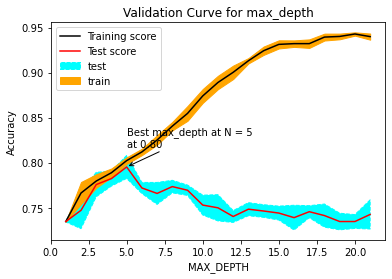|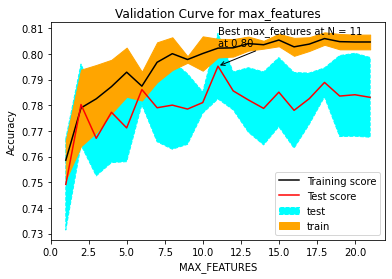|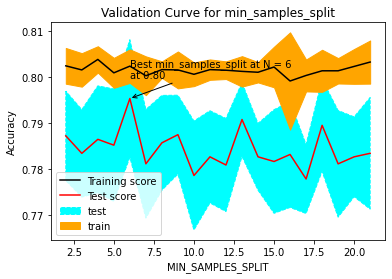

<div><center><h3>has_churned</h3>
    <table>
    <tr><th><center>Y_pred1_max_depth_5</center></th></tr>
    <tr><td>

| Prediction   | False             | True              |
|:-------------|:------------------|:------------------|
| False        | 1116              | 222               |
| True         | 127               | 227               |
| -----        | -----             | -----             |
| Accuracy     | -----             | 79.37352245862884 |
| -----        | -----             | -----             |
| Precision    | 83.40807174887892 | nan               |
| Recall       | 89.78278358809332 | nan               |
| f1-score     | 86.47810925997675 | nan               |
| support      | 1243.0            | nan               |
| Precision    | nan               | 64.12429378531074 |
| Recall       | nan               | 50.55679287305123 |
| f1-score     | nan               | 56.53798256537983 |
| support      | nan               | 449.0             |

</td>

</tr></table></center></div>


In [6]:
tel_df = pd.read_csv('telco_csv_data.csv')

# Transform data
tel_df.drop(columns=['customer_id', 'start_date', 'churn'], inplace=True)
tel_df.replace({'matches_orig': {'#DIV/0!': pd.notna}}, inplace=True)
tel_df['avg_monthly_charges'] = pd.to_numeric(tel_df.avg_monthly_charges, errors='coerce', downcast='float')


tel_imputer = SimpleImputer(strategy='mean')
tel_imputer_obj = SimpleImputer(strategy='most_frequent')
tel_df['avg_monthly_charges'] = tel_imputer.fit_transform(tel_df[['avg_monthly_charges']])
tel_df['total_charges'] = tel_imputer.fit_transform(tel_df[['total_charges']])
tel_df['matches_orig'] = tel_imputer_obj.fit_transform(tel_df[['matches_orig']])

telco_df, replace_key, revert_key = replace_obj_cols(tel_df)

tel_train, tel_validate, tel_test = acquire.train_validate_test_split(telco_df, target='has_churned')


tel_train['baseline'] = False
ipt_tel_t = tel_train[['has_churned', 'baseline']]
ipt_tel_v = tel_validate[['has_churned']]
ipt_tel_test= tel_test[['has_churned']]

# print(confusion_table(ipt_tel_t))
tel_train.drop(columns='baseline', inplace=True)

In [7]:
# Create X & y version of train, validate, test where y is just the
# Series with the target variable and X is all of the features

X_tel_train= tel_train.drop(columns=['has_churned'])
y_tel_train = tel_train['has_churned']



X_tel_validate = tel_validate.drop(columns=['has_churned'])
y_tel_validate = tel_validate['has_churned']

X_tel_test = tel_test.drop(columns=['has_churned'])
y_tel_test = tel_test['has_churned']



clf_tel = DecisionTreeClassifier()

tel_max_depth_range = np.arange(1,22,1)

param_grid = {'max_depth': tel_max_depth_range,
             'max_features': tel_max_depth_range,
             'min_samples_split' : tel_max_depth_range}

# Best features from GridSearchCV
# {'max_depth': 5, 'max_features': 11, 'min_samples_split': 6}
# val = explore_validation_curve(X=X_tel_train, y=y_tel_train, param_grid=param_grid, model=clf_tel)


# clf_tel = DecisionTreeClassifier(max_depth=5, max_features=11, min_samples_split=6, splitter='best')
# clf_tel = clf_tel.fit(X_tel_train, y_tel_train)


# y_pred_tel = val.predict(X_tel_train)
# y_pred_proba_tel = val.predict_proba(X_tel_train)


# print(f'Accuracy of Decision Tree classifier on training set: {val.score(X_tel_validate, y_tel_validate)}')

# y_pred1_tel = val.predict(X_tel_validate)
# ipt_tel_v['y_pred1_max_depth_5'] = val.predict(X_tel_validate)
# print(confusion_table(ipt_tel_v))


<center><h1>Random Forest Exercises</h1></center>





<center><h3>Titanic Dataset feature importance</h3></center>

|                    |      sex |     fare |       age |    class |   pclass |      deck |   passenger_id |     sibsp |   embarked |   embark_town |     alone |     parch |
|:-------------------|---------:|---------:|----------:|---------:|---------:|----------:|---------------:|----------:|-----------:|--------------:|----------:|----------:|
| feature_importance | 0.415097 | 0.115833 | 0.0742075 | 0.073721 | 0.071738 | 0.0710371 |      0.0686954 | 0.0326924 |  0.0208691 |     0.0194997 | 0.0185427 | 0.0180671 |



In [8]:
from sklearn.ensemble import RandomForestClassifier

# Make the model
rf = RandomForestClassifier(n_estimators=63, max_depth=12)

# rf_parma_grid = {'max_depth': np.arange(1,13,1),'n_estimators': np.arange(1, 100, 1)}

#### Hyperparameter Attenuation for Titanic Dataset ####
#### {'max_depth': 12, 'n_estimators': 63}
# rf_val = explore_validation_curve(X_train, y_train, rf_parma_grid, rf)

# Fit the model
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

########################### list feature importance and sort from highest importance to lowest ###################
# features = pd.DataFrame(rf_val.feature_importances_, index=[col for col in X_train.columns]).sort_values(by=0, ascending=False)
# features.rename(columns={0: 'feature_importance'}, inplace=True)
# Markdown(features.T.to_markdown())




0.8044692737430168

### The below validation curve will assist in choosing the best n_estimators and max_depth
|||
| :-: | :-: |
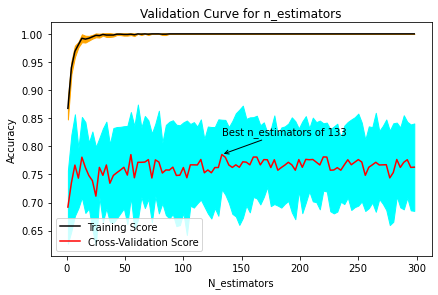|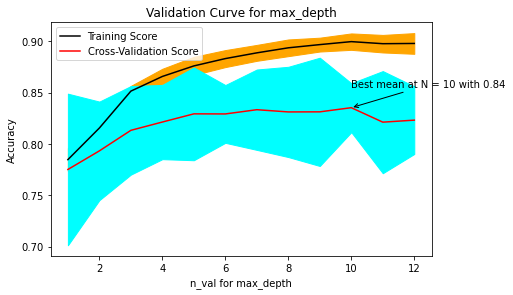


In [9]:
import numpy as np

rf = RandomForestClassifier(min_samples_split=13, min_samples_leaf=2, max_depth=10, n_estimators=133)
# val = explore_validation_curve(X_train, y_train, 'max_depth', np.arange(1, 13, 1), rf)

rf.fit(X_train, y_train)
rf.score(X_validate, y_validate)
y_pred = pd.DataFrame({'y_pred': rf.predict(X_train)})
y_pred_proba = rf.predict_proba(X_train)
ipt = pd.DataFrame({'survived' : y_train}).merge(y_pred, left_index=True, right_index=True, how='inner')

Markdown(confusion_table(ipt))

<div><center><h3>survived</h3>
    <table>
    <tr><th><center>Y_pred</center></th></tr>
    <tr><td>

| Prediction   | 0                  | 1                  |
|:-------------|:-------------------|:-------------------|
| 0            | 115                | 77                 |
| 1            | 55                 | 30                 |
| -----        | -----              | -----              |
| Accuracy     | -----              | 52.34657039711191  |
| -----        | -----              | -----              |
| Precision    | 59.895833333333336 | nan                |
| Recall       | 67.64705882352942  | nan                |
| f1-score     | 63.53591160220995  | nan                |
| support      | 170.0              | nan                |
| Precision    | nan                | 35.294117647058826 |
| Recall       | nan                | 28.037383177570092 |
| f1-score     | nan                | 31.25              |
| support      | nan                | 107.0              |

</td>

</tr></table></center></div>

In [10]:

# Make the model with the best hyperparamaters
rf = RandomForestClassifier(criterion='gini', min_samples_leaf=3,
                                max_depth=4, n_estimators=329)

# Fit the model 
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8491620111731844

In [11]:
from itertools import combinations
from explore import *

# X_train.drop(columns='passenger_id', inplace=True)
quant_vars = ['fare', 'age', 'sibsp']
cat_vars = [col for col in X_train.columns if col not in quant_vars]


# explore_bivariate(train, 'survived', cat_vars, quant_vars)



<center><h1>K-Nearest Neighbors</h1></center>

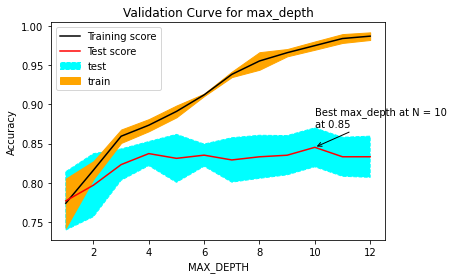



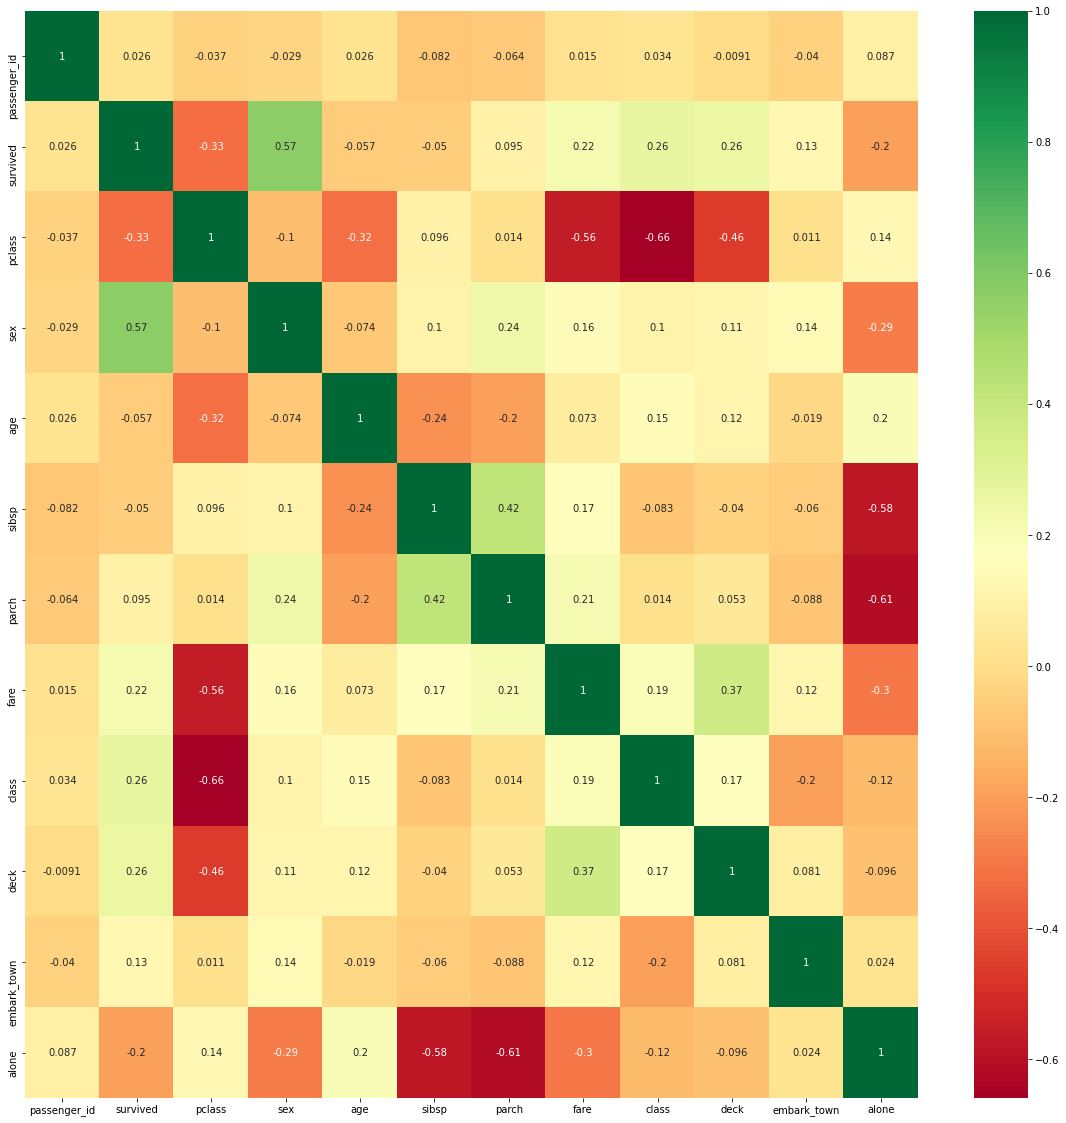

<centeR><h3>Attribute Correlation</h3></center>

|              |   survived |
|:-------------|-----------:|
| survived     |  1         |
| sex          |  0.569884  |
| class        |  0.264289  |
| deck         |  0.257984  |
| fare         |  0.220026  |
| embark_town  |  0.127246  |
| parch        |  0.0947258 |
| passenger_id |  0.0256568 |
| sibsp        | -0.0501644 |
| age          | -0.05718   |
| alone        | -0.195411  |
| pclass       | -0.326539  |


Corr greater than .10: `(sex, class, deck, fare, embark_town, pclass, alone)


### The best features for the K-Nearest Neighbors were 

* `('passenger_id', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'alone')`
<center><h3>TRAIN</h3></center>

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.809249 | 0.912052 |   0.85758  | 307        |
| 1            |    0.822368 | 0.65445  |   0.728863 | 191        |
| accuracy     |    0.813253 | 0.813253 |   0.813253 |   0.813253 |
| macro avg    |    0.815808 | 0.783251 |   0.793222 | 498        |
| weighted avg |    0.81428  | 0.813253 |   0.808213 | 498        |

<center><h3>VALIDATE</h3></center>


|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.77707  | 0.924242 |   0.844291 | 132       |
| 1            |    0.824561 | 0.573171 |   0.676259 |  82       |
| accuracy     |    0.78972  | 0.78972  |   0.78972  |   0.78972 |
| macro avg    |    0.800816 | 0.748707 |   0.760275 | 214       |
| weighted avg |    0.795268 | 0.78972  |   0.779905 | 214       |



<center><h3>TEST</h3></center>


|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.80315  | 0.927273 |   0.860759 | 110        |
| 1            |    0.846154 | 0.637681 |   0.727273 |  69        |
| accuracy     |    0.815642 | 0.815642 |   0.815642 |   0.815642 |
| macro avg    |    0.824652 | 0.782477 |   0.794016 | 179        |
| weighted avg |    0.819727 | 0.815642 |   0.809304 | 179        |

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
cols = [col for col in train.columns if col not in ['survived', 'passenger_id']]
X = train[cols]        #independent columns
y = train.iloc[:,1]    #target column i.e survived

#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
# g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# corr = pd.DataFrame(corrmat.sort_values(by='survived', ascending=False).survived)
# print(corr.to_markdown())

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

### The code below tests all models and features to see what combination provides the best accuracy.

<center><h3>Train</h3></center>

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.914634 | 0.977199 |   0.944882 | 307        |
| 1            |    0.958824 | 0.853403 |   0.903047 | 191        |
| accuracy     |    0.929719 | 0.929719 |   0.929719 |   0.929719 |
| macro avg    |    0.936729 | 0.915301 |   0.923964 | 498        |
| weighted avg |    0.931582 | 0.929719 |   0.928837 | 498        |

<center><h3>Validate</h3></center>

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.823944 | 0.886364 |   0.854015 | 132        |
| 1            |    0.791667 | 0.695122 |   0.74026  |  82        |
| accuracy     |    0.813084 | 0.813084 |   0.813084 |   0.813084 |
| macro avg    |    0.807805 | 0.790743 |   0.797137 | 214        |
| weighted avg |    0.811576 | 0.813084 |   0.810426 | 214        |

<center><h3>Test</h3></center>

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.836207 | 0.881818 |   0.858407 | 110        |
| 1            |    0.793651 | 0.724638 |   0.757576 |  69        |
| accuracy     |    0.821229 | 0.821229 |   0.821229 |   0.821229 |
| macro avg    |    0.814929 | 0.803228 |   0.807991 | 179        |
| weighted avg |    0.819803 | 0.821229 |   0.819539 | 179        |

In [34]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

############################ Run if most_accurate_comb agree #############################
most_accurate_comb = ('passenger_id', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'alone')
# most_accurate_comb = ('sex', 'class', 'deck', 'fare', 'embark_town', 'pclass', 'alone')
accuracy = 0

# all_combs = list()
# for i in range(2, len(X_train.columns) + 1):
#     all_combs.extend(set(list(combinations(X_train.columns, i))))

# tries = 0
# # best features ('pclass', 'sex', 'age', 'sibsp', 'class') with 80.84% accuracy
# for combo in all_combs:
#     if tries % 100 == 0:
#         print(tries)
#     X_Train = X_train[[*combo]]
#     dc = DecisionTreeClassifier()
#     rf = RandomForestClassifier(n_jobs=-1)
#     knn = KNeighborsClassifier(n_jobs=-1)
#     lr = LogisticRegression(n_jobs=-1)
#     models = [dc, rf, knn, lr]
#     for each_model in models:
#         each_model.fit(X_Train, y_train)
#         train_score = each_model.score(X_train[[*combo]], y_train)
#         val_score = each_model.score(X_validate[[*combo]], y_validate)
#         mean_score = (train_score + val_score) / 2
#         if mean_score > accuracy:
#             print(mean_score)
#             most_accurate_comb = {each_model : combo}
#             accuracy = mean_score
#         tries += 1
        
# print(most_accurate_comb, accuracy)

val = RandomForestClassifier(max_depth=26, n_estimators=95, max_samples=174)

# param_grid = {'min_samples_leaf': np.arange(1,200)}

############################# Run this to establish the model with best hyperparameters #############################
# val = explore_validation_curve(X_train[[*most_accurate_comb]], y_train, param_grid, knn)

# val = GridSearchCV(knn, param_grid, return_train_score=True)
val.fit(X_train[[*most_accurate_comb]], y_train)

# print(val.best_estimator_)

y_pred_train = val.predict(X_train[[*most_accurate_comb]])
y_pred = val.predict(X_validate[[*most_accurate_comb]])
y_pred_test = val.predict(X_test[[*most_accurate_comb]])

# print(pd.DataFrame(classification_report(y_true=y_train, y_pred=y_pred_train, output_dict=True)).T.to_markdown())
# print(pd.DataFrame(classification_report(y_true=y_validate, y_pred=y_pred, output_dict=True)).T.to_markdown())
# print(pd.DataFrame(classification_report(y_true=y_test, y_pred=y_pred_test, output_dict=True)).T.to_markdown())



<center><h1>Logistic Regression</h1></center>

|    | col_name     |   coefficent |   correlation |
|---:|:-------------|-------------:|--------------:|
|  1 | pclass       | -0.530935    |    -0.326539  |
| 10 | alone        | -0.483034    |    -0.195411  |
|  4 | sibsp        | -0.482772    |    -0.0501644 |
|  5 | parch        | -0.0856992   |     0.0947258 |
|  3 | age          | -0.0261771   |    -0.05718   |
|  6 | fare         | -0.000313574 |     0.220026  |
|  0 | passenger_id |  0.00057521  |     0.0256568 |
|  8 | deck         |  0.269919    |     0.257984  |
|  7 | class        |  0.434025    |     0.264289  |
|  9 | embark_town  |  0.505417    |     0.127246  |
|  2 | sex          |  2.67348     |     0.569884  |


<center><h3>Train</h3></center>

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.840979 | 0.895765 |   0.867508 | 307        |
| 1            |    0.812865 | 0.727749 |   0.767956 | 191        |
| accuracy     |    0.831325 | 0.831325 |   0.831325 |   0.831325 |
| macro avg    |    0.826922 | 0.811757 |   0.817732 | 498        |
| weighted avg |    0.830196 | 0.831325 |   0.829326 | 498        |

<center><h3>Validate</h3></center>

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.8      | 0.848485 |   0.823529 | 132        |
| 1            |    0.72973  | 0.658537 |   0.692308 |  82        |
| accuracy     |    0.775701 | 0.775701 |   0.775701 |   0.775701 |
| macro avg    |    0.764865 | 0.753511 |   0.757919 | 214        |
| weighted avg |    0.773074 | 0.775701 |   0.773248 | 214        |

<center><h3>Test</h3></center>

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.810345 | 0.854545 |   0.831858 | 110        |
| 1            |    0.746032 | 0.681159 |   0.712121 |  69        |
| accuracy     |    0.787709 | 0.787709 |   0.787709 |   0.787709 |
| macro avg    |    0.778188 | 0.767852 |   0.77199  | 179        |
| weighted avg |    0.785554 | 0.787709 |   0.785703 | 179        |



In [132]:
logit = LogisticRegression()
param_grid = {
    'max_inter' : np.arange(1, 200)
}

logit.fit(X_train, y_train)

# val = explore_validation_curve(X_train, y_train, param_grid, logit)
# logit.score(X_test, y_test)

train_corr_df = train.corr()['survived'].reset_index()
float(train_corr_df[train_corr_df['index'] == 'pclass'].survived)

coef_df = pd.DataFrame([{ 'col_name': col,
                         'coefficent' : logit.coef_[0][n],
                         'correlation': float(train_corr_df[train_corr_df['index'] == col].survived)
                        } for n, col in enumerate(list(X_train.columns))]).sort_values(by='coefficent')

prob_df_train = logit.predict(X_train)
prob_df_val = logit.predict(X_validate)
prob_df_test = logit.predict(X_test)

# print(pd.DataFrame(classification_report(y_true=y_train, y_pred=prob_df_train, output_dict=True)).T.to_markdown())
# print(pd.DataFrame(classification_report(y_true=y_validate, y_pred=prob_df_val, output_dict=True)).T.to_markdown())
# print(pd.DataFrame(classification_report(y_true=y_test, y_pred=prob_df_test, output_dict=True)).T.to_markdown())


